## Netflix Titles Dataset

### Libraries Used

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import statsmodels.api as sm
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import acf, pacf
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib.pylab import rcParams
from pandas.core import window
rcParams['figure.figsize'] = 10, 6

### Data Review

In [2]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Richard Finn, Tim Maltby","Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",9-Sep-19,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,NaN,Jandino Asporaat,United Kingdom,9-Sep-16,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,NaN,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,8-Sep-18,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,NaN,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,8-Sep-18,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,Fernando Lebrija,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,8-Sep-17,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [3]:
df.shape

(6234, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6234 entries, 0 to 6233
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       6234 non-null   int64 
 1   type          6234 non-null   object
 2   title         6234 non-null   object
 3   director      4265 non-null   object
 4   cast          5664 non-null   object
 5   country       5758 non-null   object
 6   date_added    6223 non-null   object
 7   release_year  6234 non-null   int64 
 8   rating        6224 non-null   object
 9   duration      6234 non-null   object
 10  listed_in     6234 non-null   object
 11  description   6234 non-null   object
dtypes: int64(2), object(10)
memory usage: 584.6+ KB


In [5]:
df.isnull().sum()

show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64

In [6]:
print("Shape of the dataset: ", df.shape)
print("_______________________________________")
print("Number of null values: ")
print(df.isnull().sum())
print("_______________________________________")
print("Number of unique values: ")
print(df.nunique())

Shape of the dataset:  (6234, 12)
_______________________________________
Number of null values: 
show_id            0
type               0
title              0
director        1969
cast             570
country          476
date_added        11
release_year       0
rating            10
duration           0
listed_in          0
description        0
dtype: int64
_______________________________________
Number of unique values: 
show_id         6234
type               2
title           6172
director        3301
cast            5469
country          554
date_added      1524
release_year      72
rating            14
duration         201
listed_in        461
description     6226
dtype: int64


##### there are alot of missing values we have here

In [7]:
df.duplicated().any()

False

##### no duplicates found in the dataset

### Data Cleaning and Manipulation

In [8]:
df.drop(['director'], axis = 1, inplace = True)

In [9]:
df.isnull().sum()

show_id           0
type              0
title             0
cast            570
country         476
date_added       11
release_year      0
rating           10
duration          0
listed_in         0
description       0
dtype: int64

In [10]:
# removing rows that contain missing data
df.dropna(inplace = True)

In [11]:
df.isnull().sum()

show_id         0
type            0
title           0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [12]:
df.head()

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",9-Sep-19,2019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,9-Sep-16,2016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,8-Sep-18,2013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob..."
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,8-Sep-18,2016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,8-Sep-17,2017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...


In [13]:
df.shape

(5256, 11)

In [14]:
df.dtypes

show_id          int64
type            object
title           object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

#### Converting the columns with dates to it's proper datatype. (datetime)

In [15]:
df['date_added'].value_counts()

1-Jan-20          108
1-Nov-19           80
1-Mar-18           75
1-Oct-19           68
31-Dec-19          66
                 ... 
13-Jan-20           1
11-Jan-20           1
11-Jan-18           1
1-Jan-08            1
 April 1, 2014      1
Name: date_added, Length: 1439, dtype: int64

In [16]:
df.date_added = pd.to_datetime(df.date_added)
df.year = df['date_added'].apply(lambda datetime: datetime.year)
df.month = df['date_added'].apply(lambda datetime: datetime.month)
df.release_year = pd.to_datetime(df.release_year)
df.release_year.dt.year

0       1970
1       1970
2       1970
3       1970
4       1970
        ... 
6218    1970
6219    1970
6220    1970
6221    1970
6222    1970
Name: release_year, Length: 5256, dtype: int64

In [17]:
df.dtypes

show_id                  int64
type                    object
title                   object
cast                    object
country                 object
date_added      datetime64[ns]
release_year    datetime64[ns]
rating                  object
duration                object
listed_in               object
description             object
dtype: object

In [18]:
shows_added = df.groupby("date_added")[["show_id"]].count()
shows_added

,show_id
date_added,
2008-01-01,1
2009-05-05,1
2009-11-18,1
2010-11-01,1
2011-05-17,1
...,...
2020-01-14,4
2020-01-15,9
2020-01-16,10


In [19]:
shows_added =shows_added.rename({"show_id" : "Number_of_shows_added"} , axis = 1)
shows_added

,Number_of_shows_added
date_added,
2008-01-01,1
2009-05-05,1
2009-11-18,1
2010-11-01,1
2011-05-17,1
...,...
2020-01-14,4
2020-01-15,9
2020-01-16,10


In [20]:
df.duration.value_counts()

1 Season      941
2 Seasons     252
3 Seasons     141
90 min         95
95 min         91
             ... 
38 min          1
224 min         1
178 min         1
228 min         1
13 Seasons      1
Name: duration, Length: 191, dtype: int64

In [21]:
# adding a column to see what kind of people that watch the shows

ratingAgeGroups = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}

df['age_group'] = df['rating'].replace(ratingAgeGroups)
df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,1970-01-01 00:00:00.000002019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,Older Kids
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,2016-09-09,1970-01-01 00:00:00.000002016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,Adults
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,1970-01-01 00:00:00.000002013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",Older Kids
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,1970-01-01 00:00:00.000002016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,Older Kids
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,1970-01-01 00:00:00.000002017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,Teens
...,...,...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand",2019-04-10,1970-01-01 00:00:00.000002017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...,Kids
6219,80186475,TV Show,PokÃ©mon the Series,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,2019-04-01,1970-01-01 00:00:00.000002019,TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...,Older Kids
6220,70272742,TV Show,Justin Time,"Gage Munroe, Scott McCord, Jenna Warren",Canada,2016-04-01,1970-01-01 00:00:00.000002012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien...",Kids
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,2016-04-01,1970-01-01 00:00:00.000002016,TV-14,2 Seasons,"International TV Shows, Reality TV",A new set of six men and women start their liv...,Teens


### EDA

In [22]:
# TV Movies Dataframe
dfMovies = df[df['type'] == 'Movie']

# TV Shows Dataframe
dfShows = df[df['type'] == 'TV Show']

#### What is the most common type of shows in Netflix ?

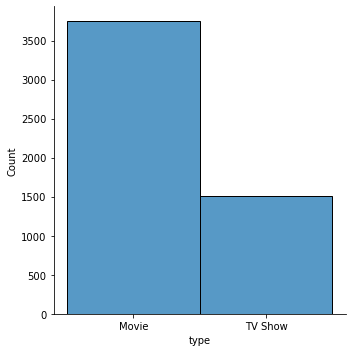

In [23]:
sns.displot(data=df, x="type")

In [24]:
dfMovies.type.value_counts()

Movie    3750
Name: type, dtype: int64

In [25]:
dfShows.type.value_counts()

TV Show    1506
Name: type, dtype: int64

<AxesSubplot:ylabel='type'>

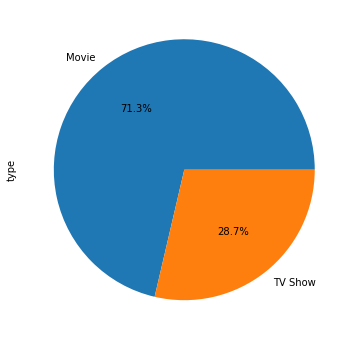

In [26]:
round(df['type'].value_counts()/ df.shape[0]*100,2).plot.pie(autopct = '%1.1f%%')

##### Movies in Netflix are the most Common shows in it nearly equal to 72 % in spite of having a lot of tv shows in the last couple of years.

In [27]:
shows_added

,Number_of_shows_added
date_added,
2008-01-01,1
2009-05-05,1
2009-11-18,1
2010-11-01,1
2011-05-17,1
...,...
2020-01-14,4
2020-01-15,9
2020-01-16,10


In [28]:
shows_added.index

DatetimeIndex(['2008-01-01', '2009-05-05', '2009-11-18', '2010-11-01',
               '2011-05-17', '2011-09-27', '2011-10-01', '2012-02-21',
               '2012-07-15', '2012-07-20',
               ...
               '2020-01-09', '2020-01-10', '2020-01-11', '2020-01-12',
               '2020-01-13', '2020-01-14', '2020-01-15', '2020-01-16',
               '2020-01-17', '2020-01-18'],
              dtype='datetime64[ns]', name='date_added', length=1133, freq=None)

### Does TV Shows have an impact on Netflix over time ?

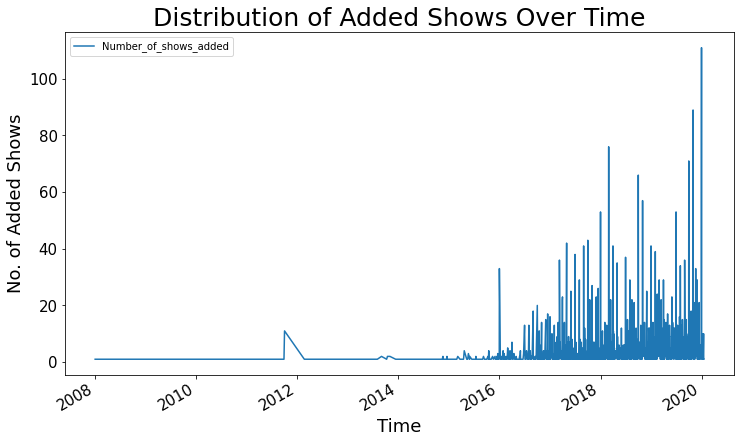

In [29]:
shows_added.plot(figsize = (12,7));
plt.title('Distribution of Added Shows Over Time', size = 25)
plt.xlabel("Time", size = 18)
plt.ylabel("No. of Added Shows", size = 18)
plt.xticks(size = 15);
plt.yticks(size = 15);

##### Obviously The Answer is yes as in the last years Netflix showed that they are interested in having a lot of shows in their site.


In [30]:
shows_added['day_name'] = shows_added.index.day_name()
shows_added['month_name'] = shows_added.index.month_name()
shows_added['year'] = shows_added.index.year
shows_added

,Number_of_shows_added,day_name,month_name,year
date_added,,,,
2008-01-01,1,Tuesday,January,2008
2009-05-05,1,Tuesday,May,2009
2009-11-18,1,Wednesday,November,2009
2010-11-01,1,Monday,November,2010
2011-05-17,1,Tuesday,May,2011
...,...,...,...,...
2020-01-14,4,Tuesday,January,2020
2020-01-15,9,Wednesday,January,2020
2020-01-16,10,Thursday,January,2020


In [31]:
shows_added.columns

Index(['Number_of_shows_added', 'day_name', 'month_name', 'year'], dtype='object')

In [32]:
shows_added['day_name'].value_counts()

Friday       234
Tuesday      184
Thursday     164
Wednesday    151
Saturday     143
Monday       141
Sunday       116
Name: day_name, dtype: int64

In [33]:
shows_added['month_name'].value_counts()

December     126
October      109
January       98
November      95
September     93
July          91
August        90
April         89
March         88
May           86
February      86
June          82
Name: month_name, dtype: int64

In [34]:
shows_added.groupby("day_name").count()

,Number_of_shows_added,month_name,year
day_name,,,
Friday,234,234,234
Monday,141,141,141
Saturday,143,143,143
Sunday,116,116,116
Thursday,164,164,164
Tuesday,184,184,184
Wednesday,151,151,151


In [35]:
shows_added.groupby("day_name").sum()

,Number_of_shows_added,year
day_name,,
Friday,1547,472017
Monday,568,284487
Saturday,526,288529
Sunday,481,234024
Thursday,762,330899
Tuesday,737,371202
Wednesday,635,304659


In [36]:
total_per_week =shows_added.groupby("day_name")['Number_of_shows_added'].sum()
total_per_week

day_name
Friday       1547
Monday        568
Saturday      526
Sunday        481
Thursday      762
Tuesday       737
Wednesday     635
Name: Number_of_shows_added, dtype: int64

<AxesSubplot:xlabel='day_name'>

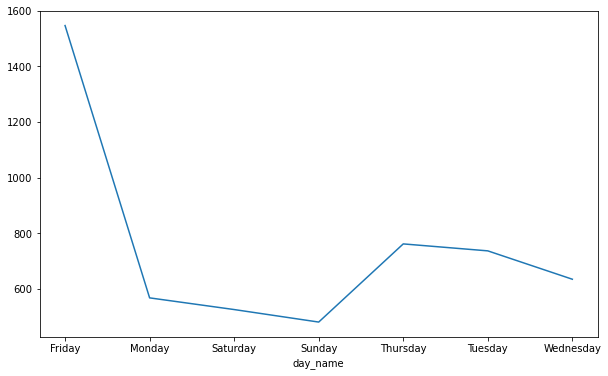

In [37]:
total_per_week.plot()

<AxesSubplot:xlabel='date_added'>

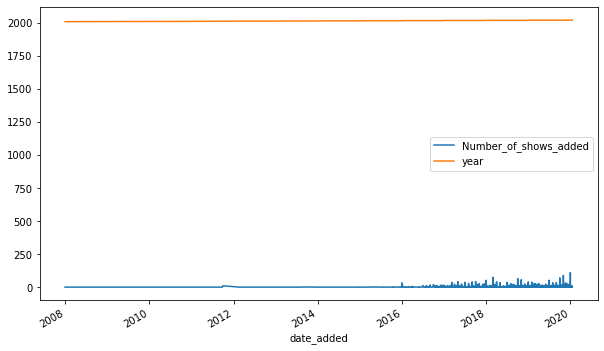

In [38]:
shows_added.plot()

In [39]:
update = shows_added.index >= '2016-01-01'
update

array([False, False, False, ...,  True,  True,  True])

In [40]:
shows_added2 = shows_added.loc[update, :].copy()
shows_added2

,Number_of_shows_added,day_name,month_name,year
date_added,,,,
2016-01-01,33,Friday,January,2016
2016-01-08,1,Friday,January,2016
2016-01-13,1,Wednesday,January,2016
2016-01-15,2,Friday,January,2016
2016-01-22,1,Friday,January,2016
...,...,...,...,...
2020-01-14,4,Tuesday,January,2020
2020-01-15,9,Wednesday,January,2020
2020-01-16,10,Thursday,January,2020


#### How many tv shows added from the begining of covid 19 ?

<AxesSubplot:xlabel='date_added'>

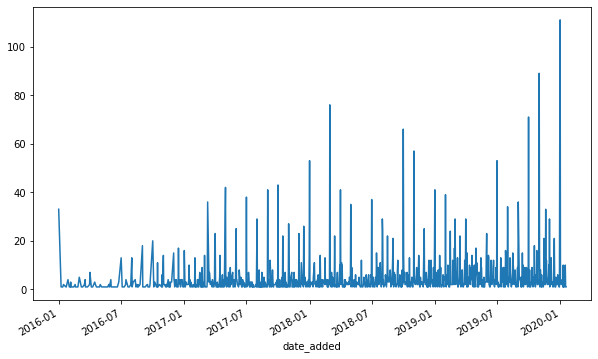

In [41]:
shows_added2['Number_of_shows_added'].plot()

##### More than 100 TV shows were added on Netflix and rising 

In [42]:
weekly_date = (shows_added.resample("1W").sum())

In [43]:
shows_added

,Number_of_shows_added,day_name,month_name,year
date_added,,,,
2008-01-01,1,Tuesday,January,2008
2009-05-05,1,Tuesday,May,2009
2009-11-18,1,Wednesday,November,2009
2010-11-01,1,Monday,November,2010
2011-05-17,1,Tuesday,May,2011
...,...,...,...,...
2020-01-14,4,Tuesday,January,2020
2020-01-15,9,Wednesday,January,2020
2020-01-16,10,Thursday,January,2020


In [44]:
weekly_date

,Number_of_shows_added,year
date_added,,
2008-01-06,1,2008
2008-01-13,0,0
2008-01-20,0,0
2008-01-27,0,0
2008-02-03,0,0
...,...,...
2019-12-22,16,14133
2019-12-29,16,10095
2020-01-05,189,12118


<AxesSubplot:xlabel='date_added'>

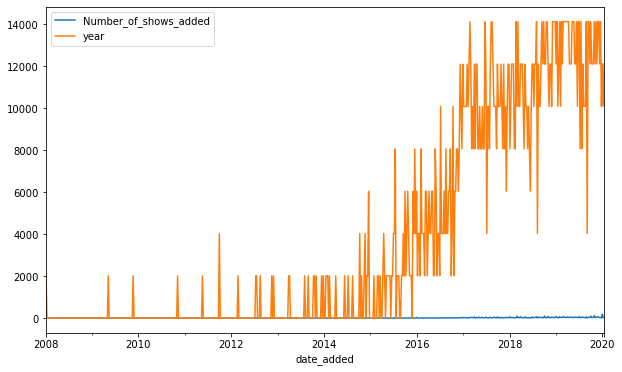

In [45]:
weekly_date.plot()

### What are the most countries that watch Netflix ?

In [46]:
df.country.value_counts()

United States                                    1799
India                                             755
United Kingdom                                    290
Japan                                             172
South Korea                                       133
                                                 ... 
United States, Cambodia                             1
United Kingdom, Spain, United States, Germany       1
Ghana, United States                                1
Austria, United States                              1
Cyprus, Austria, Thailand                           1
Name: country, Length: 502, dtype: int64

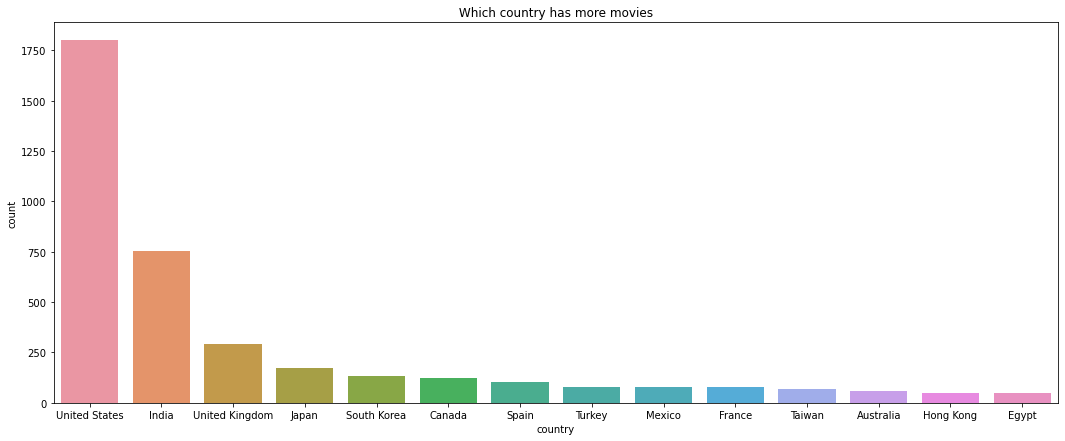

In [47]:
plt.figure(figsize=(18 ,7 ))
sns.countplot(data = df , x = df['country'] , order=df['country'].value_counts().index[0:14])
plt.title(' Which country has more movies ') ; 

##### USA is the most country that has more movies (more than 1750 movie) followed by India.

### What is the highest Days of TV shows ?

Text(0, 0.5, 'Number of Added Shows')

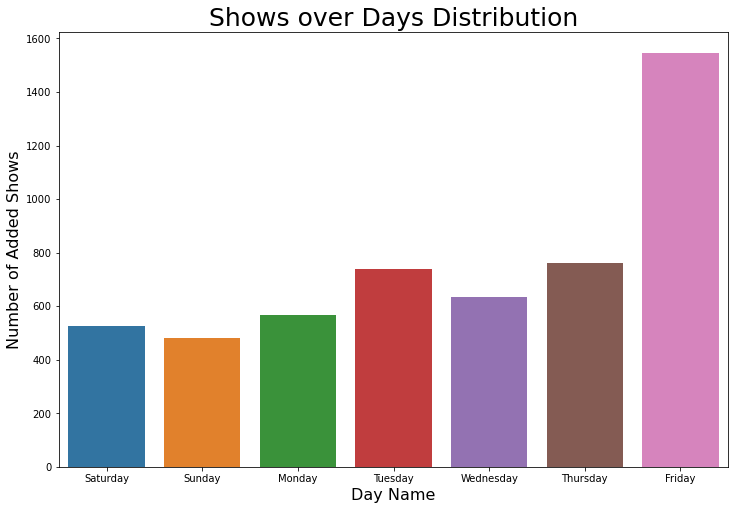

In [48]:
dayName = shows_added.groupby(['day_name'])['Number_of_shows_added'].sum()
plt.figure(figsize = (12,8))
sns.barplot(dayName.index, dayName.values,
           order = ['Saturday', 'Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'],),
plt.title('Shows over Days Distribution', size = 25)
plt.xlabel('Day Name', size = 16)
plt.ylabel('Number of Added Shows', size = 16)

##### Most People watch tv shows on Friday.

### What is the highest Months of TV shows ?

Text(0, 0.5, 'Number of Added Shows')

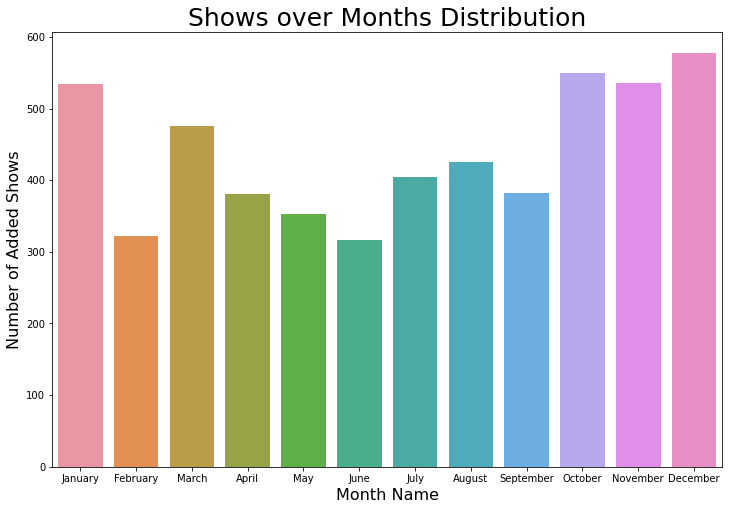

In [49]:
monthName = shows_added.groupby(['month_name'])['Number_of_shows_added'].sum()
plt.figure(figsize = (12,8))

sns.barplot(monthName.index, monthName.values,
           order = ['January', 'February', 'March', 'April', 'May', 'June','July', 'August', 'September', 'October', 'November', 'December'],),
plt.title('Shows over Months Distribution', size = 25)
plt.xlabel('Month Name', size = 16)
plt.ylabel('Number of Added Shows', size = 16)

##### Most People watch tv shows in December Followed by October and January.

### What is the highest years of TV shows ?

Text(0, 0.5, 'Number of Added Shows')

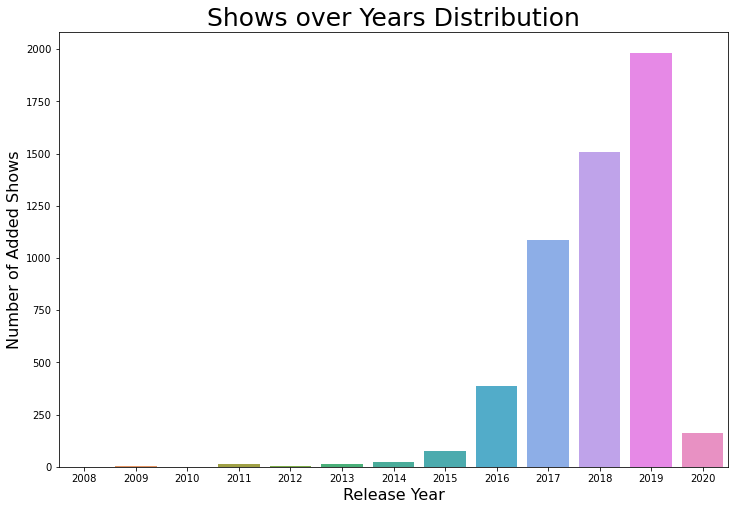

In [50]:
year = shows_added.groupby(['year'])['Number_of_shows_added'].sum()
plt.figure(figsize = (12,8))

sns.barplot(year.index, year.values),
plt.title('Shows over Years Distribution', size = 25)
plt.xlabel('Release Year', size = 16)
plt.ylabel('Number of Added Shows', size = 16)

##### In 2019 About 2000 New TV show was added on Netflix.

In [51]:
shows_added

,Number_of_shows_added,day_name,month_name,year
date_added,,,,
2008-01-01,1,Tuesday,January,2008
2009-05-05,1,Tuesday,May,2009
2009-11-18,1,Wednesday,November,2009
2010-11-01,1,Monday,November,2010
2011-05-17,1,Tuesday,May,2011
...,...,...,...,...
2020-01-14,4,Tuesday,January,2020
2020-01-15,9,Wednesday,January,2020
2020-01-16,10,Thursday,January,2020


### What are the top 30 Genres on Netflix ?

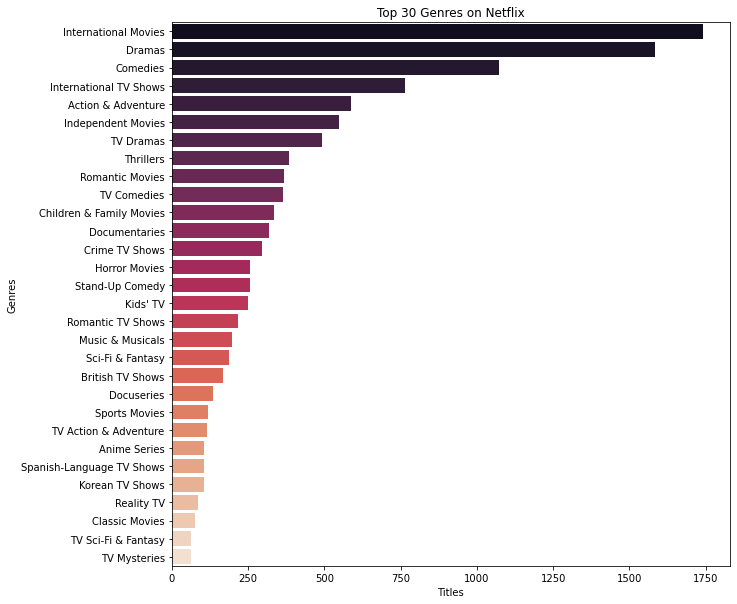

In [52]:
filtered_genres = df.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True);

plt.figure(figsize=(10,10))
g = sns.countplot(y = filtered_genres, order=filtered_genres.value_counts().index[:30],palette="rocket")
plt.title('Top 30 Genres on Netflix')
plt.xlabel('Titles')
plt.ylabel('Genres')
plt.show()

##### International Movies are the top Genre on Netflix.

In [53]:
shows_added

,Number_of_shows_added,day_name,month_name,year
date_added,,,,
2008-01-01,1,Tuesday,January,2008
2009-05-05,1,Tuesday,May,2009
2009-11-18,1,Wednesday,November,2009
2010-11-01,1,Monday,November,2010
2011-05-17,1,Tuesday,May,2011
...,...,...,...,...
2020-01-14,4,Tuesday,January,2020
2020-01-15,9,Wednesday,January,2020
2020-01-16,10,Thursday,January,2020


In [54]:
df['year_added'] = pd.DatetimeIndex(df['date_added']).year
df['month_added'] = df['date_added'].dt.month
df

,show_id,type,title,cast,country,date_added,release_year,rating,duration,listed_in,description,age_group,year_added,month_added
0,81145628,Movie,Norm of the North: King Sized Adventure,"Alan Marriott, Andrew Toth, Brian Dobson, Cole...","United States, India, South Korea, China",2019-09-09,1970-01-01 00:00:00.000002019,TV-PG,90 min,"Children & Family Movies, Comedies",Before planning an awesome wedding for his gra...,Older Kids,2019,9
1,80117401,Movie,Jandino: Whatever it Takes,Jandino Asporaat,United Kingdom,2016-09-09,1970-01-01 00:00:00.000002016,TV-MA,94 min,Stand-Up Comedy,Jandino Asporaat riffs on the challenges of ra...,Adults,2016,9
2,70234439,TV Show,Transformers Prime,"Peter Cullen, Sumalee Montano, Frank Welker, J...",United States,2018-09-08,1970-01-01 00:00:00.000002013,TV-Y7-FV,1 Season,Kids' TV,"With the help of three human allies, the Autob...",Older Kids,2018,9
3,80058654,TV Show,Transformers: Robots in Disguise,"Will Friedle, Darren Criss, Constance Zimmer, ...",United States,2018-09-08,1970-01-01 00:00:00.000002016,TV-Y7,1 Season,Kids' TV,When a prison ship crash unleashes hundreds of...,Older Kids,2018,9
4,80125979,Movie,#realityhigh,"Nesta Cooper, Kate Walsh, John Michael Higgins...",United States,2017-09-08,1970-01-01 00:00:00.000002017,TV-14,99 min,Comedies,When nerdy high schooler Dani finally attracts...,Teens,2017,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6218,80162994,TV Show,Talking Tom and Friends,"Colin Hanks, Tom Kenny, James Adomian, Lisa Sc...","Cyprus, Austria, Thailand",2019-04-10,1970-01-01 00:00:00.000002017,TV-G,2 Seasons,"Kids' TV, TV Comedies",Full of funny one-liners and always ready for ...,Kids,2019,4
6219,80186475,TV Show,PokÃ©mon the Series,"Sarah Natochenny, Laurie Hymes, Jessica Paquet...",Japan,2019-04-01,1970-01-01 00:00:00.000002019,TV-Y7-FV,2 Seasons,"Anime Series, Kids' TV",Ash and his Pikachu travel to the Alola region...,Older Kids,2019,4
6220,70272742,TV Show,Justin Time,"Gage Munroe, Scott McCord, Jenna Warren",Canada,2016-04-01,1970-01-01 00:00:00.000002012,TV-Y,2 Seasons,Kids' TV,"In Justin's dreams, he and his imaginary frien...",Kids,2016,4
6221,80067942,TV Show,Terrace House: Boys & Girls in the City,"You, Reina Triendl, Ryota Yamasato, Yoshimi To...",Japan,2016-04-01,1970-01-01 00:00:00.000002016,TV-14,2 Seasons,"International TV Shows, Reality TV",A new set of six men and women start their liv...,Teens,2016,4


In [55]:
df.year_added.isnull().sum()

0

In [56]:
df.dtypes

show_id                  int64
type                    object
title                   object
cast                    object
country                 object
date_added      datetime64[ns]
release_year    datetime64[ns]
rating                  object
duration                object
listed_in               object
description             object
age_group               object
year_added               int64
month_added              int64
dtype: object

#### What is the number of added shows on netflix on the last couple of years

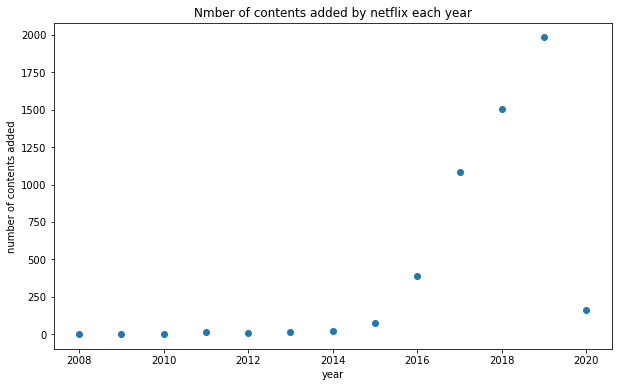

In [57]:
df1=df.groupby("year_added")[["show_id"]].count()
plt.figure(figsize=(10,6))

x=df1.index
y=df1["show_id"]
plt.scatter(x,y)
plt.title("Nmber of contents added by netflix each year")
plt.xlabel("year",color="Black")
plt.ylabel("number of contents added")
plt.show()

##### It seems that netflix most new shows were added in the gap between 2016 to 2019.

#### What is the type of rating that has the highest score for tv show and movie ?

<AxesSubplot:xlabel='rating', ylabel='count'>

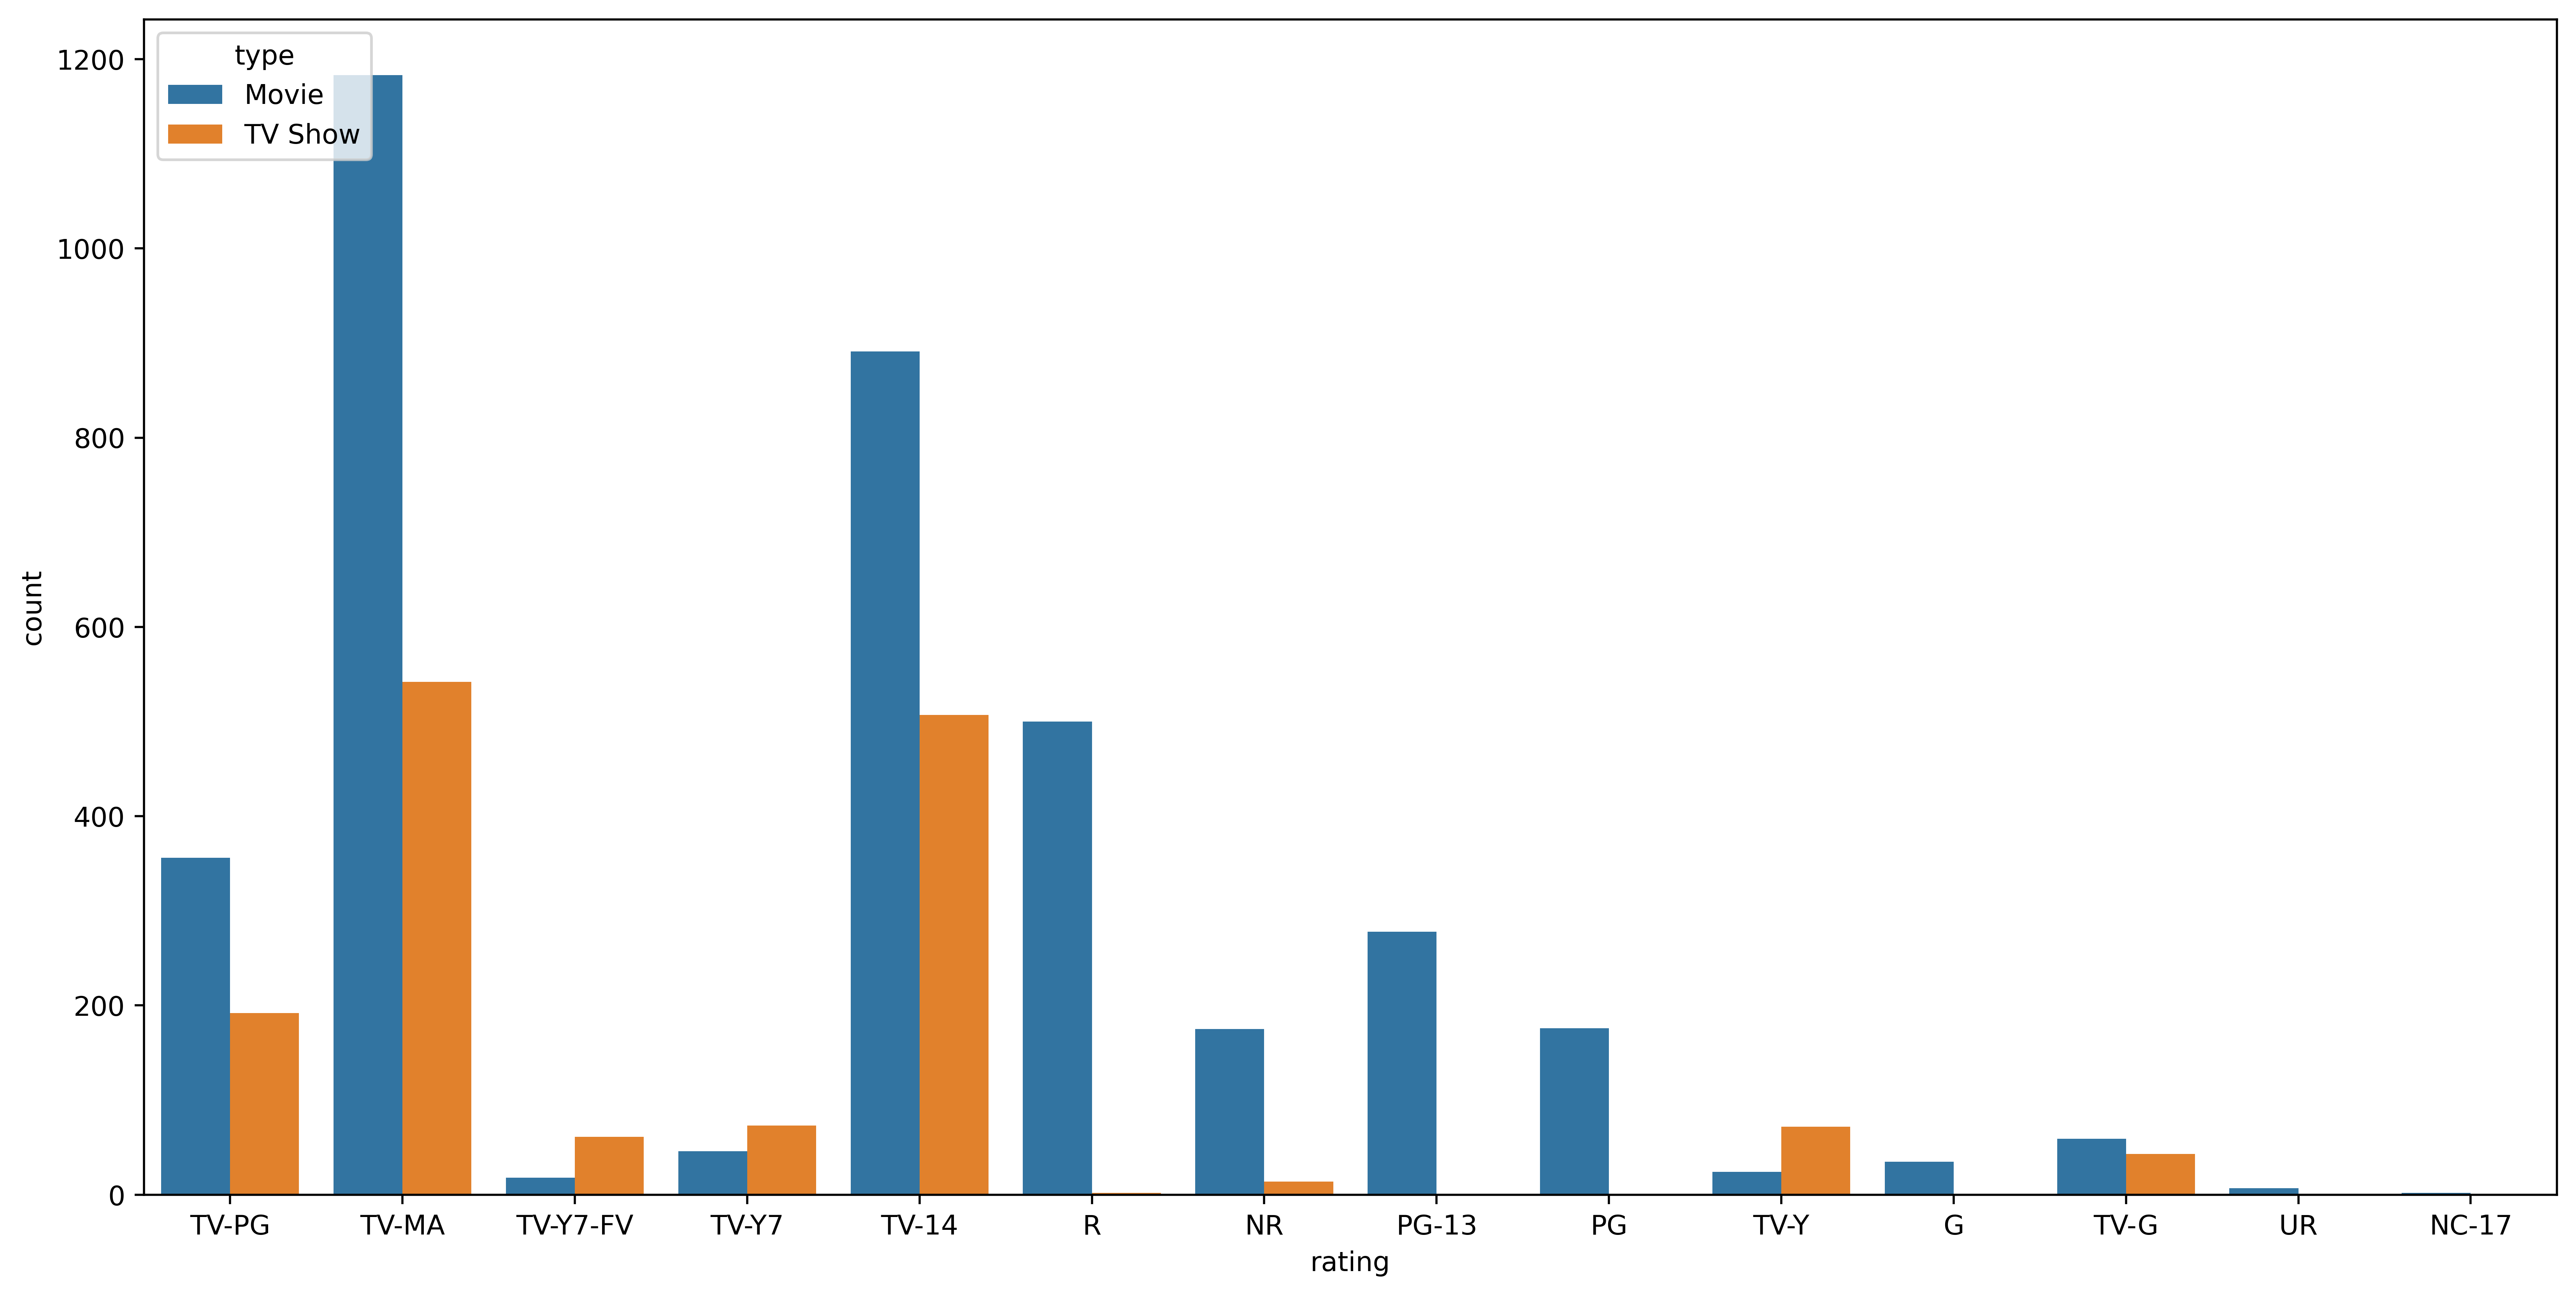

In [58]:
plt.figure(figsize = (16,8),dpi = 500)
sns.countplot(x='rating',data = df,hue='type')

##### TV-MA followed by TV-14 both have the highest ratings

### Autocorrelation and Partial Correlation

In [59]:
def ACF_and_PACF(data):
    fig = plt.figure(figsize=(17,10))
    ax1 = fig.add_subplot(211)
    fig = plot_acf(data , lags = 30 , ax = ax1)
    ax2 = fig.add_subplot(212)
    fig = plot_pacf(data , lags = 30 , ax = ax2)

In [60]:
df["date_added"]=pd.to_datetime(df['date_added'])
shows_added=df.groupby(pd.Grouper(key='date_added', axis=0, freq='M'))["show_id"].count()
shows_added=shows_added.to_frame()
shows_added = shows_added.rename({"show_id": "value"} , axis = 1)
shows_added

,value
date_added,
2008-01-31,1
2008-02-29,0
2008-03-31,0
2008-04-30,0
2008-05-31,0
...,...
2019-09-30,138
2019-10-31,186
2019-11-30,253


In [61]:
start_date = '2014-1-1'
mask = (shows_added.index > start_date)
shows_added=shows_added.loc[mask]
shows_added

,value
date_added,
2014-01-31,2
2014-02-28,2
2014-03-31,0
2014-04-30,1
2014-05-31,0
...,...
2019-09-30,138
2019-10-31,186
2019-11-30,253


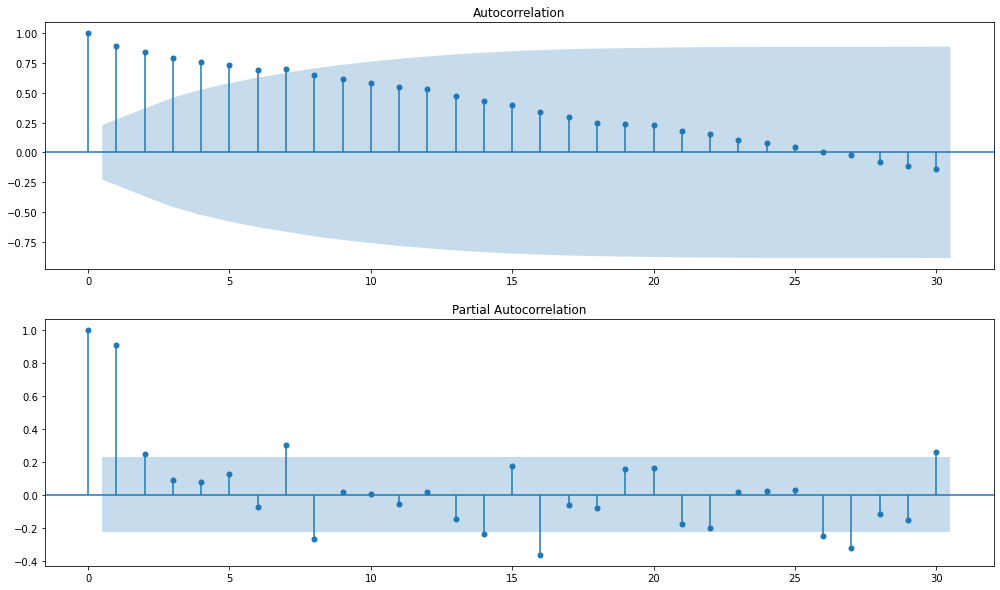

In [62]:
ACF_and_PACF(shows_added)

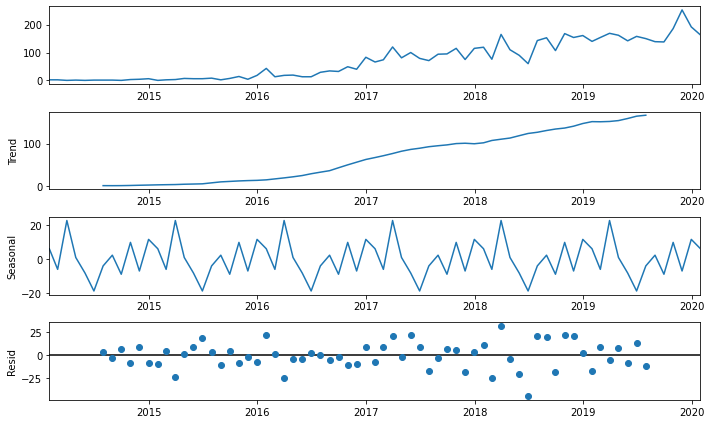

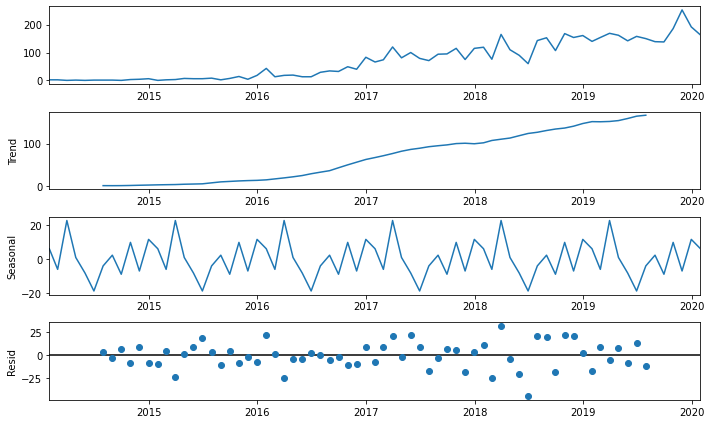

In [63]:
decomposition = sm.tsa.seasonal_decompose(shows_added ,  model = "additive")
decomposition.plot()

In [64]:
#Determine Rolling Statistics 
#window size 12 denotes 12 months, giving rolling mean at yearly level
rolmean = shows_added.rolling(window = 12).mean()
rolstd = shows_added.rolling(window = 12).std()

In [65]:
rolmean

,value
date_added,
2014-01-31,NaN
2014-02-28,NaN
2014-03-31,NaN
2014-04-30,NaN
2014-05-31,NaN
...,...
2019-09-30,152.916667
2019-10-31,154.416667
2019-11-30,162.666667


In [66]:
rolstd

,value
date_added,
2014-01-31,NaN
2014-02-28,NaN
2014-03-31,NaN
2014-04-30,NaN
2014-05-31,NaN
...,...
2019-09-30,11.171867
2019-10-31,14.183591
2019-11-30,31.787171


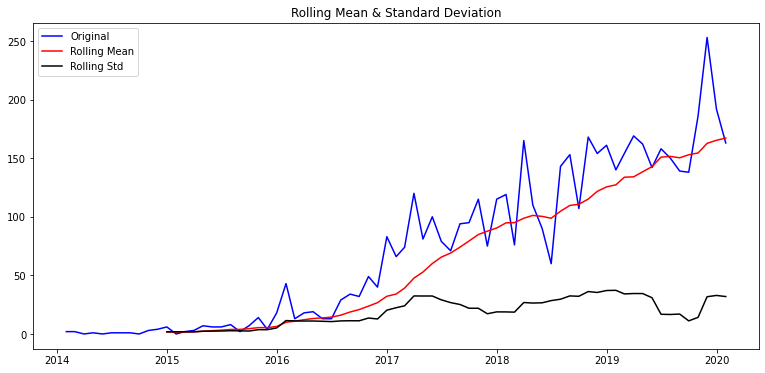

In [67]:
#Determine rolling statistics
plt.figure(figsize=(13,6))
#Plot rolling statistics
orig = plt.plot(shows_added, color='blue', label='Original')
mean = plt.plot(rolmean, color='red', label='Rolling Mean')
std = plt.plot(rolstd, color='black', label='Rolling Std')
plt.legend(loc='best')
plt.title('Rolling Mean & Standard Deviation')
plt.show(block=False)

In [68]:
print("Results of Dickey Fuller Test: ")
dftest = adfuller(shows_added['value'] , autolag= "AIC")

dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
for key,value in dftest[4].items():
    dfoutput['Critical Value (%s)'%key] = value
    
print(dfoutput)

Results of Dickey Fuller Test: 
Test Statistic                  0.824811
p-value                         0.992026
#Lags Used                      6.000000
Number of Observations Used    66.000000
Critical Value (1%)            -3.533560
Critical Value (5%)            -2.906444
Critical Value (10%)           -2.590724
dtype: float64


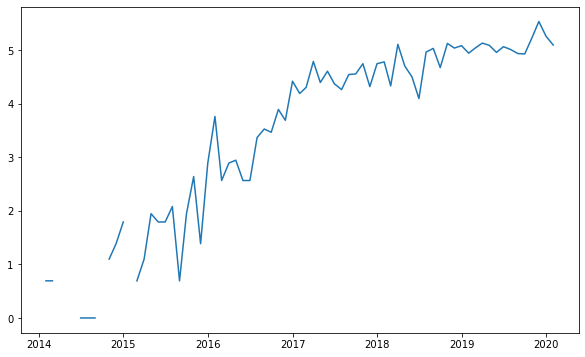

In [69]:
#estimating trend
shows_added_logScale = np.log(shows_added)
plt.plot(shows_added_logScale)

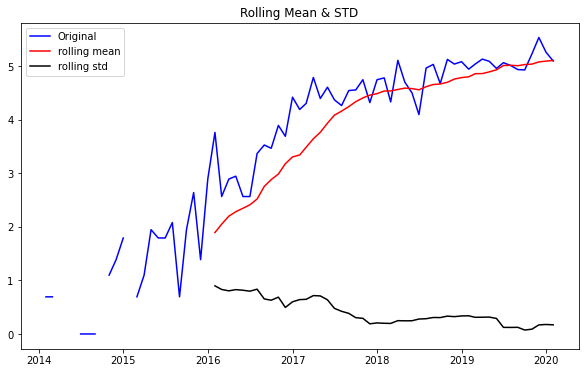

In [70]:
#plot rolling statistics
orig = plt.plot(shows_added_logScale , color = "blue" , label = "Original")
mean = plt.plot(shows_added_logScale.rolling(window=12).mean() , color = "red" , label = "rolling mean")
std = plt.plot(shows_added_logScale.rolling(window=12).std() , color = "black" , label = "rolling std")
plt.legend(loc = "best")
plt.title ("Rolling Mean & STD")
plt.show()

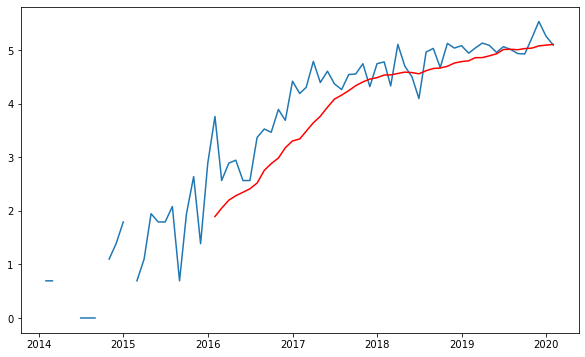

In [71]:
#The below transformation is required to make series stationary
movingAverage = shows_added_logScale.rolling(window=12).mean()
movingSTD = shows_added_logScale.rolling(window=12).std()
plt.plot(shows_added_logScale)
plt.plot(movingAverage, color='red')

In [72]:
datasetLogScaleMinusMovingAverage = shows_added_logScale - movingAverage
datasetLogScaleMinusMovingAverage.head(12)

#Remove NAN values
datasetLogScaleMinusMovingAverage.dropna(inplace=True)
datasetLogScaleMinusMovingAverage.head(10)

,value
date_added,
2016-01-31,1.868149
2016-02-29,0.515915
2016-03-31,0.692024
2016-04-30,0.662881
2016-05-31,0.218958
2016-06-30,0.154526
2016-07-31,0.849551
2016-08-31,0.772515
2016-09-30,0.585238


<AxesSubplot:xlabel='date_added'>

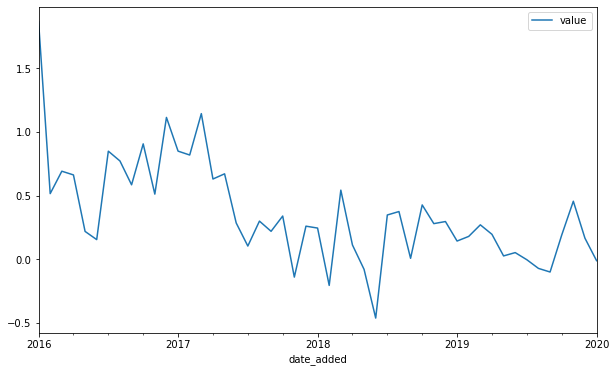

In [73]:
datasetLogScaleMinusMovingAverage.plot()

In [74]:
def test_stationarity(timeseries):
    
    #Determine rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    #Plot rolling statistics
    orig = plt.plot(timeseries, color='blue', label='Original')
    mean = plt.plot(movingAverage, color='red', label='Rolling Mean')
    std = plt.plot(movingSTD, color='black', label='Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey–Fuller test:
    print('Results of Dickey Fuller Test:')
    dftest = adfuller(timeseries['value'], autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print(dfoutput)

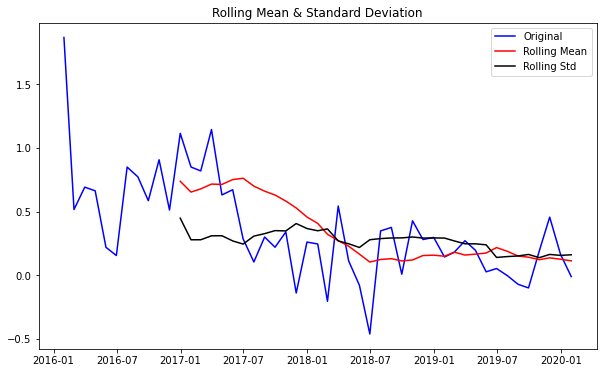

Results of Dickey Fuller Test:
Test Statistic                 -1.325148
p-value                         0.617590
#Lags Used                      7.000000
Number of Observations Used    41.000000
Critical Value (1%)            -3.600983
Critical Value (5%)            -2.935135
Critical Value (10%)           -2.605963
dtype: float64


In [75]:
test_stationarity(datasetLogScaleMinusMovingAverage)

In [76]:
data = datasetLogScaleMinusMovingAverage.dropna()
data

,value
date_added,
2016-01-31,1.868149
2016-02-29,0.515915
2016-03-31,0.692024
2016-04-30,0.662881
2016-05-31,0.218958
2016-06-30,0.154526
2016-07-31,0.849551
2016-08-31,0.772515
2016-09-30,0.585238


## AR Model

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                   49
Model:                     ARMA(2, 0)   Log Likelihood                 -16.001
Method:                       css-mle   S.D. of innovations              0.333
Date:                Thu, 29 Sep 2022   AIC                             40.002
Time:                        13:52:28   BIC                             47.569
Sample:                    01-31-2016   HQIC                            42.873
                         - 01-31-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.4151      0.168      2.467      0.014       0.085       0.745
ar.L1.value     0.4035      0.164      2.457      0.014       0.082       0.725
ar.L2.value     0.3284      0.164      2.001    

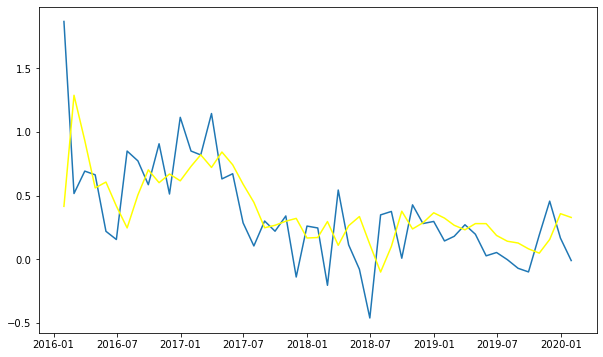

In [77]:
#AR MODEL
model = ARIMA(data , order = (2,0,0))
res_ar = model.fit()
plt.plot(data)
plt.plot(res_ar.fittedvalues , color = "yellow")
print (res_ar.summary())

## MA Model

                              ARMA Model Results                              
Dep. Variable:                  value   No. Observations:                   49
Model:                     ARMA(0, 2)   Log Likelihood                 -19.706
Method:                       css-mle   S.D. of innovations              0.361
Date:                Thu, 29 Sep 2022   AIC                             47.412
Time:                        13:52:28   BIC                             54.979
Sample:                    01-31-2016   HQIC                            50.283
                         - 01-31-2020                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
const           0.3745      0.082      4.557      0.000       0.213       0.536
ma.L1.value     0.3859      0.204      1.890      0.059      -0.014       0.786
ma.L2.value     0.2208      0.151      1.461    

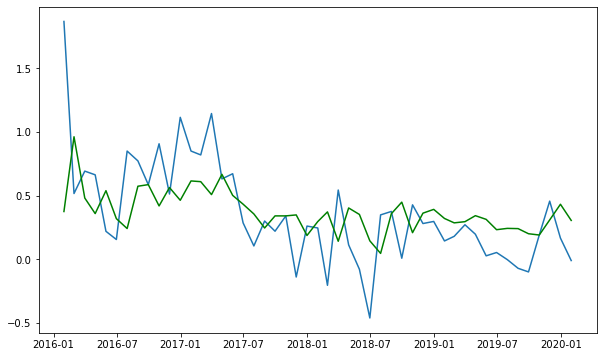

In [78]:
#MA MODEL
model = ARIMA(data , order = (0,0,2))
res_ar = model.fit()
plt.plot(data)
plt.plot(res_ar.fittedvalues , color = "green")
print (res_ar.summary())

## ARMA Model

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   49
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -13.730
Date:                Thu, 29 Sep 2022   AIC                             39.461
Time:                        13:52:31   BIC                             50.812
Sample:                    01-31-2016   HQIC                            43.767
                         - 01-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4464      0.304      1.469      0.142      -0.149       1.042
ar.L1          0.1939      0.279      0.694      0.488      -0.354       0.742
ar.L2          0.6958      0.228      3.049      0.0

C:\Users\youss\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


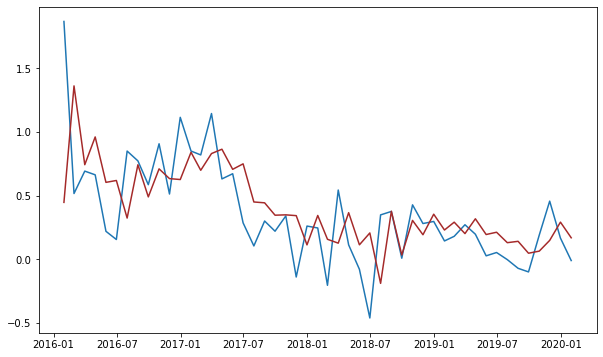

In [79]:
model = sm.tsa.arima.ARIMA(data , order= (2,0,2))
res_arma = model.fit()
plt.plot(data)
plt.plot(res_arma.fittedvalues, color = "brown")
print(res_arma.summary())

## ARIMA Model

                             ARIMA Model Results                              
Dep. Variable:                D.value   No. Observations:                   48
Model:                 ARIMA(2, 1, 1)   Log Likelihood                 -13.237
Method:                       css-mle   S.D. of innovations              0.309
Date:                Thu, 29 Sep 2022   AIC                             36.474
Time:                        13:52:31   BIC                             45.830
Sample:                    02-29-2016   HQIC                            40.010
                         - 01-31-2020                                         
                    coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------
const            -0.0192      0.005     -3.746      0.000      -0.029      -0.009
ar.L1.D.value     0.2440      0.171      1.431      0.152      -0.090       0.578
ar.L2.D.value     0.1691      0.170     

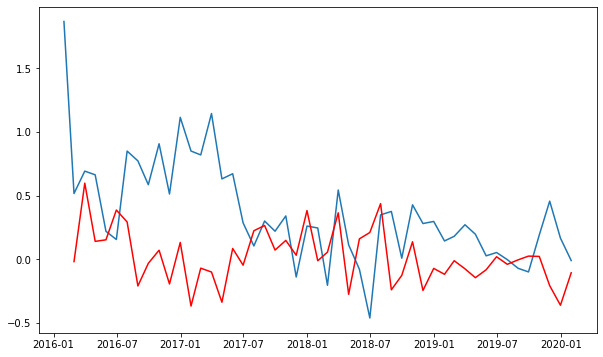

In [80]:
#ARIMA MODEL
model = ARIMA(data , order = (2,1,1))
res_ar = model.fit()
plt.plot(data)
plt.plot(res_ar.fittedvalues , color = "red")
print (res_ar.summary())

In [81]:
# Training Data
train = data[:100]
test = data[100:]

#### ARMA Train 

                               SARIMAX Results                                
Dep. Variable:                  value   No. Observations:                   49
Model:                 ARIMA(2, 0, 2)   Log Likelihood                 -13.730
Date:                Thu, 29 Sep 2022   AIC                             39.461
Time:                        13:52:49   BIC                             50.812
Sample:                    01-31-2016   HQIC                            43.767
                         - 01-31-2020                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.4464      0.304      1.469      0.142      -0.149       1.042
ar.L1          0.1939      0.279      0.694      0.488      -0.354       0.742
ar.L2          0.6958      0.228      3.049      0.0

C:\Users\youss\anaconda3\lib\site-packages\statsmodels\base\model.py:566: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


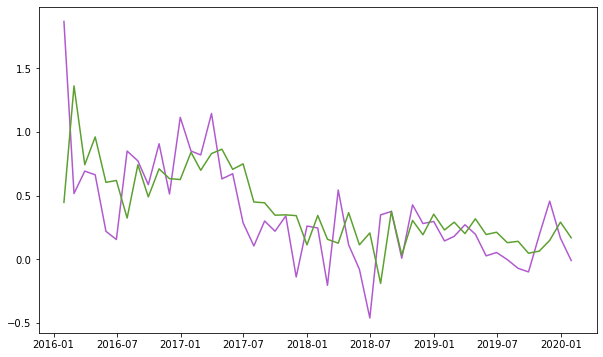

In [83]:
model = sm.tsa.arima.ARIMA(train , order= (2,0,2))
fitted = model.fit()
plt.plot(data, color = "#b15acf")
plt.plot(fitted.fittedvalues, color = "#5CA030")
print(fitted.summary())

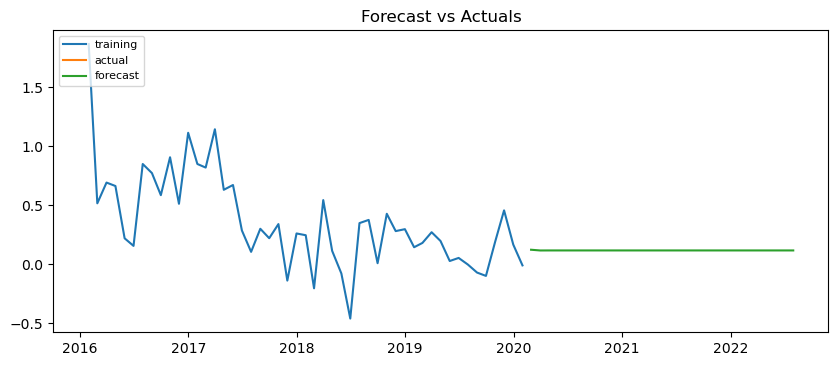

In [84]:
# Build Model
model = sm.tsa.arima.ARIMA(train, order=(1,1,1))  
fitted = model.fit()  

# Forecast
fc= fitted.forecast(steps=30, alpha=0.05)  # 95% conf

# Make as pandas series
fc_series = pd.Series(fc)

# Plot
plt.figure(figsize=(10,4), dpi=100)
plt.plot(train, label='training')
plt.plot(test, label='actual')
plt.plot(fc_series, label='forecast')
plt.title('Forecast vs Actuals')
plt.legend(loc='upper left', fontsize=8)
plt.show()

In [ ]:
# Accuracy metrics
def forecast_accuracy(forecast, actual):
    mape = np.mean(np.abs(forecast - actual)/np.abs(actual))  # MAPE
    me = np.mean(forecast - actual)             # ME
    mae = np.mean(np.abs(forecast - actual))    # MAE
    mpe = np.mean((forecast - actual)/actual)   # MPE
    rmse = np.mean((forecast - actual)**2)**.5  # RMSE
    corr = np.corrcoef(forecast, actual)[0,1]   # corr
    mins = np.amin(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    maxs = np.amax(np.hstack([forecast[:,None], 
                              actual[:,None]]), axis=1)
    minmax = 1 - np.mean(mins/maxs)             # minmax
    acf1 = acf(fc-test)[1]                      # ACF1
    return({'mape':mape, 'me':me, 'mae': mae, 
            'mpe': mpe, 'rmse':rmse, 'acf1':acf1, 
            'corr':corr, 'minmax':minmax})

forecast_accuracy(fc[:30], test)